## Getting Directional Movement Index (DMI) For Markets

#### Importing Dependencies

In [1]:
import tradingeconomics as te
from stockstats import StockDataFrame
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.graph_objs as pgo
# from IPython.display import Image

#### API login


In [2]:
te.login("jupyter:jupyter") # Signup for a free API key at https://developer.tradingeconomics.com/

### Function

In [6]:
def get_directional_movement_index(symbol, plot_type,total_days_interval):
#     symbol="BTCUSD:CUR"
#     total_days_interval = 360
    initDate = str((datetime.today() - timedelta(days=total_days_interval)).date())
    endDate = str((datetime.now() + timedelta(days=1)).date())
    df = te.fetchMarkets(symbol=symbol, initDate=initDate, endDate=endDate, output_type="df")
    stock_df = StockDataFrame.retype(df)
    stock_df

   
    
    
    def get_static_plot(df):
    
        plt.style.use('bmh')
        fig, ax = plt.subplots(figsize=(20,5))  # Create a figure and an axes.
        ax.plot(stock_df['pdi'], label='+DI, default to 14 days')  # Plot some data on the axes.
        ax.plot(stock_df['mdi'], label='-DI, default to 14 days')  # Plot some data on the axes.
        ax.plot(stock_df['dx'], label='DX, default to 14 days of +DI and -DI')  # Plot some data on the axes.
        ax.plot(stock_df['adx'], label='ADX, 6 days SMA of DX')  # Plot some data on the axes.
        ax.plot(stock_df['adxr'], label='ADXR, 6 days SMA of ADX')  # Plot some data on the axes.

        ax.set_xlabel('Date')  # Add an x-label to the axes.
        ax.set_ylabel('')  # Add a y-label to the axes.
        ax.set_title('Directional Movement Index (DMI) ' + symbol.upper())  # Add a title to the axes.
        ax.legend(fontsize='x-large')  # Add a legend.
        
    def get_dynamic_plot(df):
         #Dynamic Plot

        fig = pgo.Figure()
        fig.add_trace(pgo.Scatter(x=stock_df.index, y= stock_df['pdi'], line=dict(color='red', width= 1), name ='+DI, default to 14 days'))
        fig.add_trace(pgo.Scatter(x=stock_df.index, y= stock_df['mdi'], line=dict(color='blue', width= 1), name ='-DI, default to 14 days'))
        fig.add_trace(pgo.Scatter(x=stock_df.index, y= stock_df['dx'], line=dict(color='green', width= 1), name ='DX, default to 14 days of +DI and -DI'))
        fig.add_trace(pgo.Scatter(x=stock_df.index, y= stock_df['adx'], line=dict(color='purple', width= 1), name ='ADX, 6 days SMA of DX'))
        fig.add_trace(pgo.Scatter(x=stock_df.index, y= stock_df['adxr'], line=dict(color='black', width= 1), name ='ADXR, 6 days SMA of ADX'))
        # fig.add_trace(pgo.Scatter(x=df.index, y= df['lower band'], line=dict(color='green', width= 1), name ='Lower Band'))

    #     fig.add_trace(pgo.Candlestick(x = stock_df.index, open = stock_df['open'], high = stock_df['high'], low = stock_df['low'], close = stock_df['close'], name = symbol.upper() + ' Data'))

        fig.update_layout(title='Directional Movement Index (DMI) ' + symbol.upper(), yaxis_title='USD')

        fig.update_xaxes(rangeslider_visible = True,
                        rangeselector = dict(
                        buttons=list([           
                            dict(count=1, label='1 Month', step='month', stepmode='todate'),
                            dict(count=3, label='3 Month', step='month', stepmode='todate'),
                            dict(count=5, label='5 Month', step='month', stepmode='todate'),
                            dict(count=7, label='7 Month', step='month', stepmode='todate'),
                            dict(label='1 Year', step='all')
                        ])))
        fig.update_layout(
            autosize=True,
            height=700,
            margin=dict(
                l=50,
                r=50,
                b=100,
                t=100
            )
        )

        fig.show()

        
        
    
    if plot_type == 'static':
        get_static_plot(stock_df)
        
    if plot_type == 'dynamic':
        get_dynamic_plot(stock_df)




## GitHub non-dynamic preview

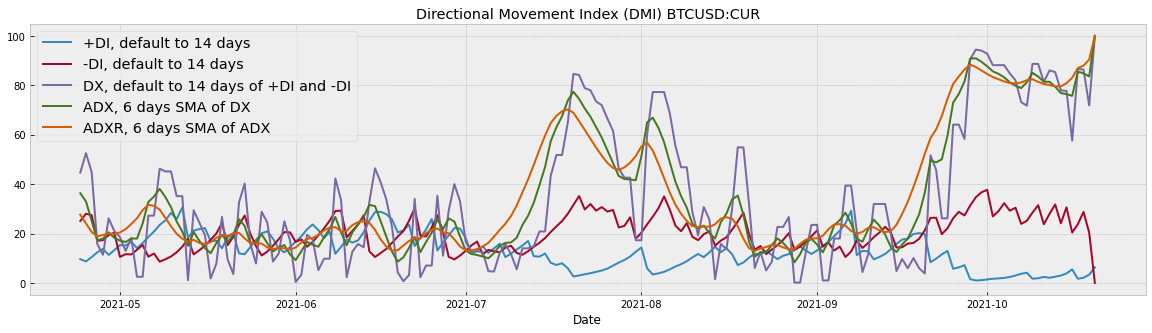

In [8]:
get_directional_movement_index(symbol="BTCUSD:CUR", plot_type='static',total_days_interval=180)

## Dynamic Plot uses Python's Kernel to render 
### (You can go to http://jupyter.tradingeconomics.com/ to use the dynamic plot)

In [11]:
# Run this line of code to get a dynamic plot
get_directional_movement_index(symbol="BTCUSD:CUR", plot_type='dynamic',total_days_interval=360)